# Höhenprofil mit Längen- & Breitengeraden aufstellen

Genutzt wird die Google Maps Elevation API

In [1]:
def makeRaster(position, steps):
    raster = []
    l_min = min([position[0][1], position[2][1]])
    l_max = max([position[1][1], position[3][1]])
    b_min = min([position[2][0], position[3][0]])
    b_max = max([position[0][0], position[1][0]])
    
    l_step_width = (l_max-l_min)/steps
    b_step_width = (b_max-b_min)/steps
    for i in np.arange(b_max, b_min, -b_step_width):
        for j in np.arange(l_min, l_max, l_step_width):
            raster.append([i, j])
    raster = np.asarray(raster)
    raster = np.random.permutation(raster)
    
    plt.scatter(raster[:,1], raster[:,0])
    plt.xlim(l_min-l_step_width/2, l_max-l_step_width/2)
    plt.ylim(b_min+b_step_width/2, b_max+b_step_width/2)
    ax = plt.gca()
    ax.ticklabel_format(useOffset=False)
    plt.title('Höhenprofil-Raster')
    plt.xlabel('Längengrad')
    plt.ylabel('Breitengrad')
    #plt.show()
    return raster

def getMapData(raster, csvPath, key):
    csvFile = open(csvPath, 'w+')
    writer = csv.writer(csvFile)
    writer.writerow(('Longitude', 'Latitude', 'Resolution', 'Elevation'))
    
    raster = list(raster)
    url_array = []
    while len(raster)>0:
        url = ''
        try:
            for i in range(0, 50):
                elem = raster.pop()
                url += str(elem[0])+','+str(elem[1])+'|'
        except:
            True
        url_array.append(url[:-1])
    
    infos = []
    length = len(url_array)
    pbar = pyprind.ProgBar(length)
    
    for url in url_array: 
        url = 'https://maps.googleapis.com/maps/api/elevation/json?locations='+url+'&key='+str(key)
        response = urlopen(url).read().decode('utf-8')
        data = json.loads(response)
        pbar.update()    
        
        for i in data['results']:
            lng = i.get('location').get('lng')
            lat = i.get('location').get('lat')
            res = i.get('resolution')
            elev = i.get('elevation')
            infos.append([lng, lat, res, elev])
            writer.writerow((lng, lat, res, elev))
            
    csvFile.close()
    
def plotMap(csvPath):
    profil = pd.read_csv(csvPath)
    profil = profil[['Latitude', 'Longitude', 'Elevation']]
    profil = profil.pivot(index='Latitude', columns='Longitude', values='Elevation')
    plt.title('Höhenprofil')
    ax = sns.heatmap(profil)
    plt.gca().invert_yaxis()
    plt.show()
    
def main(csvPath, key):
    raster = makeRaster(position, steps)
    getMapData(raster, csvPath, key)
    plotMap(csvPath)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import pandas as pd
from urllib.request import urlopen
import json
import csv
import pyprind


# N/W, N/O, S/W, S/O

# Längen- & Breitengrad Hönisch
position = np.asarray([[52.93017734, 9.1957164],[52.93017734, 9.24747231],[52.90927026, 9.1957164],[52.90927026, 9.24747231]])
# Position Etelsen, Luttum
position = np.asarray([[52.990493, 9.085080],[52.984500, 9.359708],[52.882481, 9.113203],[52.882067, 9.362112]])
# Position 
#position = np.asarray([[60, -20],[60, 50],[20, -20],[20, 50]])


steps = 50
csvPath = 'Höhenprofil.csv'
key = '...'

0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:08


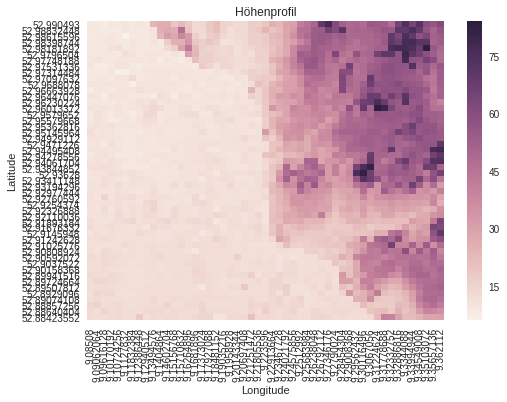

In [3]:
main(csvPath, key)